In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np 
#استدعاء المكتبات الاولى لتحليل البيانات والتانية للرسم البياني والتالتة للتعاملات الرقمية 

In [2]:
pip install mysql.connector

Note: you may need to restart the kernel to use updated packages.


In [6]:
def make_connection_with_db():
    import mysql.connector  
    connection_mydb = mysql.connector.connect(
        host = 'localhost', 
        user = 'root', 
        password = '',
        database = 'wp-ecommerce'
    )
    cursor = connection_mydb.cursor(dictionary=True)
    return connection_mydb, cursor
    

In [4]:
def get_customers_by_country():
    _,cursor = make_connection_with_db()

    sql = '''SELECT country,COUNT(customer_id)as count_by_country FROM wp_wc_customer_lookup GROUP by country;
    
        '''
    cursor.execute(sql)
    customers_results = cursor.fetchall()
    df = pd.DataFrame(columns=['country','count_by_country'])
    for customer in customers_results :
        obj = {
                "country":[customer['country']],
            "count_by_country":[customer['count_by_country']]
        }
        df_obj = pd.DataFrame(obj) # تخويل القاموس الى dataframe
        df = pd.concat([df,df_obj], ignore_index= True)
    return df 

In [7]:
df_customers_countries = get_customers_by_country()
df_customers_countries

,country,count_by_country
0,AE,209
1,BH,218
2,JO,187
3,KW,188
4,SA,179


In [27]:
def show_customers_by_countries_bar():
    df_customers_countries = get_customers_by_country()
    x = df_customers_countries['country']
    y = df_customers_countries['count_by_country']
    plt.xlabel('country')
    plt.ylabel('count')
    
    plt.title('Customers Per Countries')
    colors= []
    for i in range(len(x)):
        colors.append([np.random.rand(), np.random.rand(), np.random.rand()])
        plt.text(x=i, y=y[i], s=y[i], ha='center')
        plt.bar(x,y, color=colors)
    plt.show()

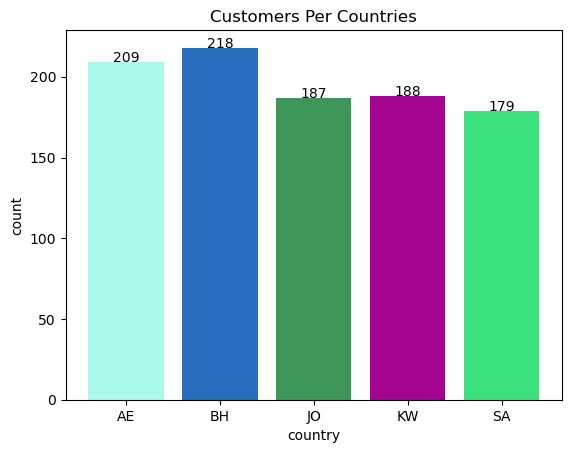

In [28]:
show_customers_by_countries_bar()

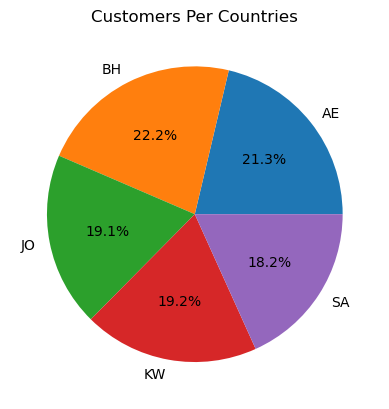

In [34]:
def show_customers_by_countries_pie():
    df_customers_countries = get_customers_by_country()

    plt.pie(df_customers_countries['count_by_country'],
            labels=df_customers_countries['country'],
            autopct='%1.1f%%')

    plt.title('Customers Per Countries')
    plt.show()

# استدعاء الدالة لرسم المخطط الدائري
show_customers_by_countries_pie()